In [2]:
# Import Libraries
import matplotlib 
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.lines import Line2D
import pyregion

In [3]:

import pyregion
import pyfits
import time

grow = fits.getdata('NGC628_HIIPhot3_All_GROW_SN3.fits')
mask = pyfits.getdata('NGC628_HIIPhot3_All_GROW_SN3.fits')
dist = pyfits.getdata('NGC628_distance_grow.fits') 
sig = np.loadtxt('NGC628_sigma.txt')

In [4]:
#start_time = time.time()
#cube = np.zeros([20,2064,2048])
#print sum(cube[0:,np.where((mask == 300) & (dist < sig[300]))[0],np.where((mask == 300) & (dist < sig[300]))[1]])
#print("--- %s seconds ---" % (time.time() - start_time))
#start_time = time.time()
#print np.sum(dist[np.where((mask == 300) & (dist < sig[300]))[0],np.where((mask == 300) & (dist < sig[300]))[1]])
#print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
from scipy.sparse import csr_matrix

def compute_M(data):
    cols = np.arange(data.size)
    return csr_matrix((cols, (data.ravel(), cols)),
                      shape=(data.max() + 1, data.size))

def get_indices_sparse(data):
    M = compute_M(data)
    return [np.unravel_index(row.data, data.shape) for row in M]


In [6]:

# Read HII Regions files
mask = pyfits.getdata('NGC628_HIIPhot3_All_GROW.fits')
dist = pyfits.getdata('NGC628_distance_grow.fits') 
sig = np.loadtxt('NGC628_sigma.txt')
# sig = sig//14.1443 # to get the pixel values instead of the pc scale
cube = np.zeros([20,2064,2048])

dump_file = np.zeros([2064,2048])
spectrum_nm = np.zeros([323,4285])

In [7]:
#indicex = []
#for i in range(1,4286):
#    indicex.append(np.where((mask == i) & (dist < sig[i-1]))[0])
#
#indicey = []
#for i in range(1,4286):
#    indicey.append(np.where((mask == i) & (dist < sig[i-1]))[1])

In [8]:
sp3 = pyfits.getdata('NGC628_SN3.merged.nm.1.0_conv3_ciel_pop_tout_regions.fits')
sp2 = pyfits.getdata('NGC628_SN2.merged.nm.1.0_conv3_ciel_pop_tout_regions.fits')
sp1 = pyfits.getdata('NGC628_SN1.merged.nm.1.0_conv3_ciel_pop_tout_regions.fits')
sp3_fit = pyfits.getdata('NGC628_SN3.regions.fit.spectrum.fits')
sp2_fit = pyfits.getdata('NGC628_SN2.regions.fit.spectrum.fits')
sp1_fit = pyfits.getdata('NGC628_SN1.regions.fit.spectrum.fits')

<IPython.core.display.Javascript object>


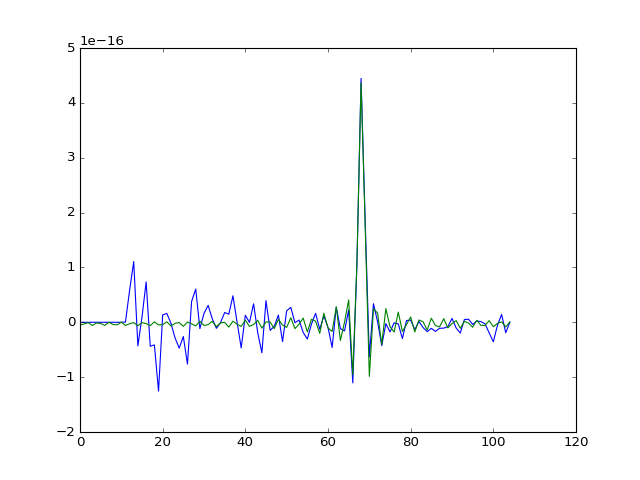

In [9]:
%matplotlib nbagg

#indice = [(oii/eoii > 3.5) & (hb/ehb > 3.5)]

plt.plot(sp1[0:, 28])
plt.plot(sp1_fit[0:, 28])

plt.show()    


In [10]:
i=2436
ha = pyfits.getdata('NGC628_SN3.regions.Ha6563_amplitude.fits')
eha = pyfits.getdata('NGC628_SN3.regions.Ha6563_amplitude_error.fits')
he = pyfits.getdata('NGC628_SN3.regions.HeI6678_amplitude.fits')
ehe = pyfits.getdata('NGC628_SN3.regions.HeI6678_amplitude_error.fits')
hb = pyfits.getdata('NGC628_SN2.regions.Hb4861_amplitude.fits')
ehb = pyfits.getdata('NGC628_SN2.regions.Hb4861_amplitude_error.fits')
vha = pyfits.getdata('NGC628_SN3.regions.Ha6563_velocity.fits')
voii = pyfits.getdata('NGC628_SN1.regions.OII3727_velocity.fits')
vhb = pyfits.getdata('NGC628_SN2.regions.Hb4861_velocity.fits')
nii1 = pyfits.getdata('NGC628_SN3.regions.NII6548_amplitude.fits')
enii1 = pyfits.getdata('NGC628_SN3.regions.NII6548_amplitude_error.fits')
nii2 = pyfits.getdata('NGC628_SN3.regions.NII6583_amplitude.fits')
enii2 = pyfits.getdata('NGC628_SN3.regions.NII6583_amplitude_error.fits')
oiii1 = pyfits.getdata('NGC628_SN2.regions.OIII4959_amplitude.fits')
eoiii1 = pyfits.getdata('NGC628_SN2.regions.OIII4959_amplitude_error.fits')
oiii2 = pyfits.getdata('NGC628_SN2.regions.OIII5007_amplitude.fits')
eoiii2 = pyfits.getdata('NGC628_SN2.regions.OIII5007_amplitude_error.fits')
oii = pyfits.getdata('NGC628_SN1.regions.OII3727_amplitude.fits')
eoii = pyfits.getdata('NGC628_SN1.regions.OII3727_amplitude_error.fits')
sii1 = pyfits.getdata('NGC628_SN3.regions.SII6716_amplitude.fits')
esii1 = pyfits.getdata('NGC628_SN3.regions.SII6716_amplitude_error.fits')
sii2 = pyfits.getdata('NGC628_SN3.regions.SII6731_amplitude.fits')
esii2 = pyfits.getdata('NGC628_SN3.regions.SII6731_amplitude_error.fits')


fha = pyfits.getdata('NGC628_SN3.regions.Ha6563_fwhm.fits')
fhe = pyfits.getdata('NGC628_SN3.regions.HeI6678_fwhm.fits')
fhb = pyfits.getdata('NGC628_SN2.regions.Hb4861_fwhm.fits')
fnii1 = pyfits.getdata('NGC628_SN3.regions.NII6548_fwhm.fits')
fnii2 = pyfits.getdata('NGC628_SN3.regions.NII6583_fwhm.fits')
foii = pyfits.getdata('NGC628_SN1.regions.OII3727_fwhm.fits')
foiii1 = pyfits.getdata('NGC628_SN2.regions.OIII4959_fwhm.fits')
foiii2 = pyfits.getdata('NGC628_SN2.regions.OIII5007_fwhm.fits')
fsii1 = pyfits.getdata('NGC628_SN3.regions.SII6716_fwhm.fits')
fsii2 = pyfits.getdata('NGC628_SN3.regions.SII6731_fwhm.fits')

r = pyfits.getdata('NGC628_regions_rayons.fits')
flux_tot = fits.getdata('NGC628_flux_tot_regions.fits')


In [11]:
toto = np.loadtxt('berg.txt')
toto2 = np.loadtxt('berg2.txt')

In [12]:

toto3 = np.zeros(47)
for i in range(0,47):
    toto3[i] = toto2[np.where(toto2 == toto[i*67,1])[0][0],2]


In [13]:
from extinction import ccm89, apply
import numpy as np
flux_ha_hb = abs(ha*fha/(hb*fhb))
eflux_ha_hb = abs(abs((ha+eha)*fha/((hb-ehb)*fhb))-abs((ha)*fha/((hb)*fhb)))

Av = 3.1*2.5/1.07*np.log10(flux_ha_hb/2.87)
ebv = 2.5/1.07*np.log10(flux_ha_hb/2.87)

eebv = abs(abs(2.5/1.07*np.log10((flux_ha_hb+eflux_ha_hb)/2.87))-abs(2.5/1.07*np.log10(flux_ha_hb/2.87)))/2

Av = np.zeros(4285)
EAv = np.zeros(4285)

# Regions E(B-V)
EBV = fits.getdata('NGC628_regions_EBV_vrai.fits')
EBV_err = fits.getdata('NGC628_regions_EBV_error_vrai.fits')

Av = 3.1*EBV
Av[(Av < 0)] = 0
EAv = 3.1*EBV_err


wave = np.ones(1)*6563
ha_corr = np.zeros(4285)
he_corr = np.zeros(4285)
nii2_corr = np.zeros(4285)
nii1_corr = np.zeros(4285)
oiii2_corr = np.zeros(4285)
oiii1_corr = np.zeros(4285)
hb_corr = np.zeros(4285)
oii_corr = np.zeros(4285)
sii2_corr = np.zeros(4285)
sii1_corr = np.zeros(4285)

flux_ha = 10*ha*fha/1.20671
flux_he = 10*he*fhe/1.20671
flux_nii2 = 10*nii2*fnii2/1.20671
flux_nii1 = 10*nii1*fnii1/1.20671
flux_sii2 = 10*sii2*fsii2/1.20671
flux_sii1 = 10*sii1*fsii1/1.20671
flux_hb = 10*hb*fhb/1.20671
flux_oiii2 = 10*oiii2*foiii2/1.20671
flux_oiii1 = 10*oiii1*foiii1/1.20671
flux_oii = 10*oii*foii/1.20671

flux_ha_err = 10*eha*fha/1.20671
flux_he_err = 10*ehe*fhe/1.20671
flux_nii2_err = 10*enii2*fnii2/1.20671
flux_nii1_err = 10*enii1*fnii1/1.20671
flux_sii2_err = 10*esii2*fsii2/1.20671
flux_sii1_err = 10*esii1*fsii1/1.20671
flux_hb_err = 10*ehb*fhb/1.20671
flux_oiii2_err = 10*eoiii2*foiii2/1.20671
flux_oiii1_err = 10*eoiii1*foiii1/1.20671
flux_oii_err = 10*eoii*foii/1.20671


# "deredden" flux by A_V = 1.0
for i in range(0,4285):
    ha_corr[i] = apply(ccm89(np.ones(1)*6563, -Av[i], 3.1), flux_ha[i])
    he_corr[i] = apply(ccm89(np.ones(1)*6678, -Av[i], 3.1), flux_he[i])
    nii1_corr[i] = apply(ccm89(np.ones(1)*6548, -Av[i], 3.1), flux_nii1[i])
    nii2_corr[i] = apply(ccm89(np.ones(1)*6583, -Av[i], 3.1), flux_nii2[i])
    sii1_corr[i] = apply(ccm89(np.ones(1)*6716, -Av[i], 3.1), flux_sii1[i])
    sii2_corr[i] = apply(ccm89(np.ones(1)*6731, -Av[i], 3.1), flux_sii2[i])
    hb_corr[i] = apply(ccm89(np.ones(1)*4861, -Av[i], 3.1), flux_hb[i])
    oiii1_corr[i] = apply(ccm89(np.ones(1)*4959, -Av[i], 3.1), flux_oiii1[i])
    oiii2_corr[i] = apply(ccm89(np.ones(1)*5007, -Av[i], 3.1), flux_oiii2[i])
    oii_corr[i] = apply(ccm89(np.ones(1)*3727, -Av[i], 3.1), flux_oii[i])
    

#for i in range(0,1000):
#    print ebv[(flux_ha > 1e-16)][i], '+-', eebv[(flux_ha > 1e-16)][i]
#fits.writeto('NGC628_regions_EBV_vrai.fits', ebv)
#fits.writeto('NGC628_regions_EBV_error_vrai.fits', eebv)
#fits.writeto('NGC628_SN3.regions.Ha6563_flux_error.fits', flux_ha_err)
#fits.writeto('NGC628_SN3.regions.HeI6678_flux_error.fits', flux_he_err) 
#fits.writeto('NGC628_SN3.regions.NII6548_flux_error.fits', flux_nii1_err) 
#fits.writeto('NGC628_SN3.regions.NII6583_flux_error.fits', flux_nii2_err) 
#fits.writeto('NGC628_SN3.regions.SII6716_flux_error.fits', flux_sii1_err) 
#fits.writeto('NGC628_SN3.regions.SII6731_flux_error.fits', flux_sii2_err) 
#fits.writeto('NGC628_SN3.regions.Hb4861_flux_error.fits', flux_hb_err) 
#fits.writeto('NGC628_SN3.regions.OIII4959_flux_error.fits', flux_oiii1_err)
#fits.writeto('NGC628_SN3.regions.OIII5007_flux_error.fits', flux_oiii2_err)
#fits.writeto('NGC628_SN3.regions.OII3727_flux_error.fits', flux_oii_err)
#
#fits.writeto('NGC628_SN3.regions.Ha6563_flux.fits', flux_ha)
#fits.writeto('NGC628_SN3.regions.HeI6678_flux.fits', flux_he) 
#fits.writeto('NGC628_SN3.regions.NII6548_flux.fits', flux_nii1) 
#fits.writeto('NGC628_SN3.regions.NII6583_flux.fits', flux_nii2) 
#fits.writeto('NGC628_SN3.regions.SII6716_flux.fits', flux_sii1) 
#fits.writeto('NGC628_SN3.regions.SII6731_flux.fits', flux_sii2) 
#fits.writeto('NGC628_SN3.regions.Hb4861_flux.fits', flux_hb) 
#fits.writeto('NGC628_SN3.regions.OIII4959_flux.fits', flux_oiii1)
#fits.writeto('NGC628_SN3.regions.OIII5007_flux.fits', flux_oiii2)
#fits.writeto('NGC628_SN3.regions.OII3727_flux.fits', flux_oii)
#
#fits.writeto('NGC628_SN3.regions.Ha6563_flux_corr.fits', ha_corr)
#fits.writeto('NGC628_SN3.regions.HeI6678_flux_corr.fits', he_corr) 
#fits.writeto('NGC628_SN3.regions.NII6548_flux_corr.fits', nii1_corr) 
#fits.writeto('NGC628_SN3.regions.NII6583_flux_corr.fits', nii2_corr) 
#fits.writeto('NGC628_SN3.regions.SII6716_flux_corr.fits', sii1_corr) 
#fits.writeto('NGC628_SN3.regions.SII6731_flux_corr.fits', sii2_corr) 
#fits.writeto('NGC628_SN3.regions.Hb4861_flux_corr.fits', hb_corr) 
#fits.writeto('NGC628_SN3.regions.OIII4959_flux_corr.fits', oiii1_corr)
#fits.writeto('NGC628_SN3.regions.OIII5007_flux_corr.fits', oiii2_corr)
#fits.writeto('NGC628_SN3.regions.OII3727_flux_corr.fits', oii_corr)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:66: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:68: RuntimeWarning: invalid value encountered in multiply


In [14]:
print hb[2436]/ehb[2436]

26.3906145469


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide


<IPython.core.display.Javascript object>


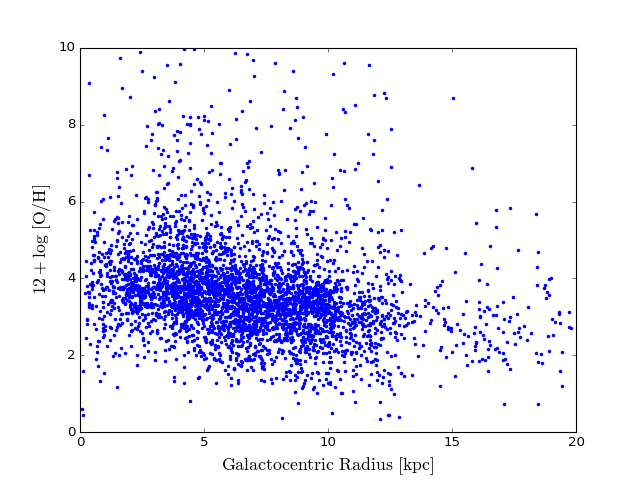

In [15]:
%matplotlib nbagg

indice = [(np.log10(ha) > -17)]
#indice = [(oii/eoii > 3.5) & (hb/ehb > 3.5)]

plt.scatter(r[indice]/(1000), (flux_ha[indice]/flux_hb[indice]), marker='.', linewidths = 0.0, s = 40)

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{12+log\,\,[O/H]}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(0,10)
plt.show()    


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract


<IPython.core.display.Javascript object>


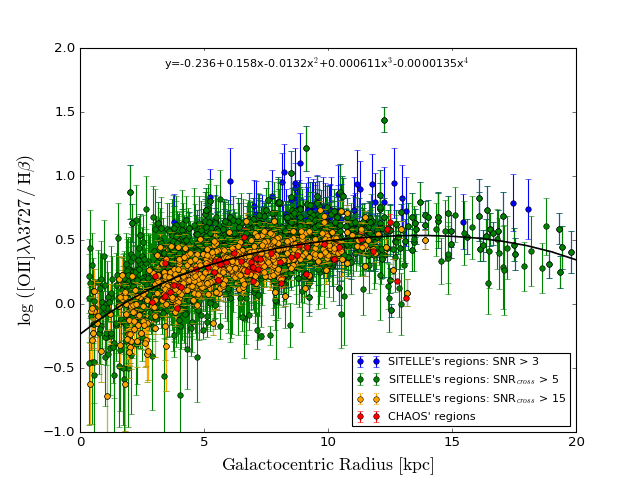

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide


In [22]:
%matplotlib nbagg
ms=5
elinewidth=1


k1 = -1000
k2 = 5
k3 = 15
indice = [(oii/eoii > 3) & (hb/ehb > 3)]

yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
plt.errorbar(r[indice]/(1000), np.log10(oii_corr[indice]/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(oii/eoii > k2) | (hb/ehb > k2)]

plt.errorbar(r[indice]/(1000), np.log10(oii_corr[indice]/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 5', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(oii/eoii > k3) | (hb/ehb > k3)]
plt.errorbar(r[indice]/(1000), np.log10(oii_corr[indice]/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 15', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)

plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4]), yerr= np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4]+(toto[np.where(toto == 3726)[0],5]+toto[np.where(toto == 3728)[0],5]))/toto[np.where(toto == 4861)[0],4])-np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4]), label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)


indice =  [(oii_corr/hb_corr > 0) & (oii/eoii > k2) | (hb/ehb > k2) & (oii_corr/hb_corr > 0) ]
fit = np.polyfit(r[indice]/(1000), np.log10(oii_corr[indice]/hb_corr[indice]),4)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:04.3f}'.format(fitt[1])+'x'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'+'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OII]\lambda\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower right',fontsize=10)
plt.xlim(0,20)
plt.ylim(-1,2)
plt.show()    


In [28]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_OIIHb_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [217]:
#k2 = 30
#k3 = 50
#map = np.zeros([2064,2048])
#
#for i in range(0, len(np.where([(oii/eoii > 2.5) & (hb/ehb > 2.5)][0] == True)[0])):
#    map[(grow == np.where([(oii/eoii > 2.5) & (hb/ehb > 2.5)][0] == True)[0][i]+1)] = 1
#for i in range(0, len(np.where([(oii/ehb > k2) | (hb/eoii > k2)][0] == True)[0])):
#    map[(grow == np.where([(oii/ehb > k2) | (hb/eoii > k2)][0] == True)[0][i]+1)] = 2
#for i in range(0, len(np.where([(oii/ehb > k3) | (hb/eoii > k3)][0] == True)[0])):
#    map[(grow == np.where([(oii/ehb > k3) | (hb/eoii > k3)][0] == True)[0][i]+1)] = 3
#for i in range(0, len(np.where([(oii/ehb > k3) & (np.log10(oii_corr/hb_corr) > 1) & (np.log10(oii_corr/hb_corr) < 3)][0] == True)[0])):
#    map[(grow == np.where([(oii/ehb > k3) & (np.log10(oii_corr/hb_corr) > 1) & (np.log10(oii_corr/hb_corr) < 3)][0] == True)[0][i]+1)] = 5
#for i in range(0, len(np.where([(oii == 0) | (hb == 0)][0] == True)[0])):
#    map[(grow == np.where([(oii == 0) | (hb == 0)][0] == True)[0][i]+1)] = 0
#fits.writeto('test_map.fits', map)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


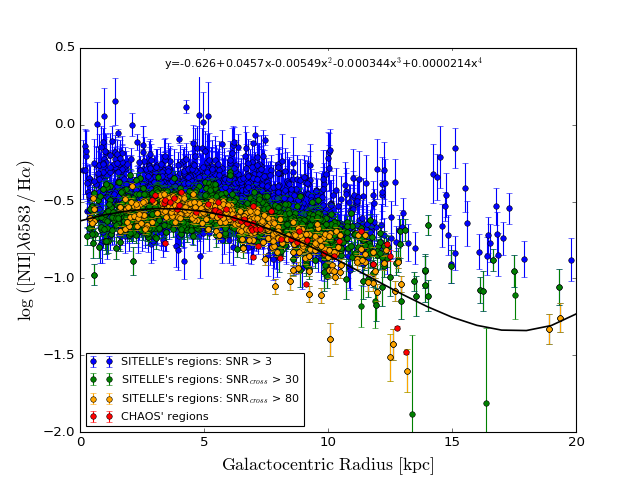

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [23]:
 %matplotlib nbagg
ms=5
elinewidth=1

k2 = 30
k3 = 80

yerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
indice = [(nii2/enii2 > 3) & (ha/eha > 3)]
plt.errorbar(r[indice]/(1000), np.log10(nii2_corr[indice]/ha_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(nii2/enii2 > k2) | (ha/eha > k2)]

plt.errorbar(r[indice]/(1000), np.log10(nii2_corr[indice]/ha_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 30', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(nii2/enii2 > k3) | (ha/eha > k3)]
plt.errorbar(r[indice]/(1000), np.log10(nii2_corr[indice]/ha_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 80', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)

plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4]), yerr= abs(abs(np.log10((toto[np.where(toto == 6583)[0],4]+(toto[np.where(toto == 6583)[0],5]))/toto[np.where(toto == 6562)[0],4]))-abs(np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4]))), label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

indice =  [(nii2_corr/ha_corr > 0) & (nii2/enii2 > k3) | (ha/eha > k3) & (nii2_corr/ha_corr > 0) ]
fit = np.polyfit(r[indice]/(1000), np.log10(nii2_corr[indice]/ha_corr[indice]),4)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(0,20)
plt.ylim(-2,0.5)
plt.show()    


In [23]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_NIIHa_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


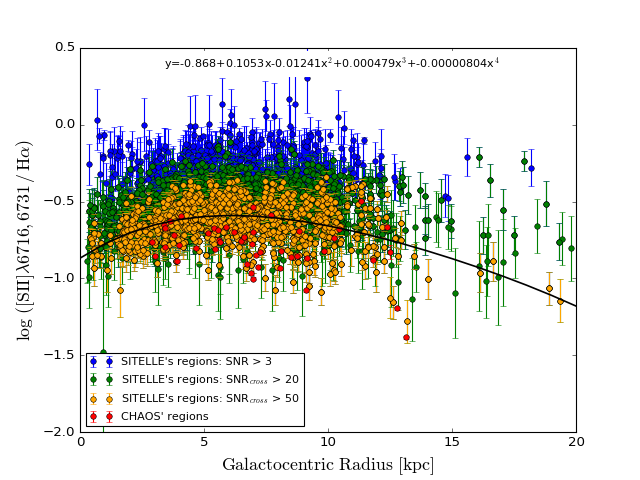

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


In [24]:
 %matplotlib nbagg
ms=5
elinewidth=1

sii_corr = sii2_corr+sii1_corr
sii = sii2+sii1
esii = esii2+esii1
fsii = (fsii1+fsii2)/2

k2 = 20
k3 = 50

yerr = abs(abs(np.log10((((sii+esii))*fsii)/(((ha-eha)*fha))))-abs(np.log10((((sii))*fsii)/(((ha)*fha)))))
indice = [(sii/esii > 3) & (ha/eha > 3)]
plt.errorbar(r[indice]/(1000), np.log10(sii_corr[indice]/ha_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(sii/esii > k2) | (ha/eha > k2)]

plt.errorbar(r[indice]/(1000), np.log10(sii_corr[indice]/ha_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 20', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(sii/esii > k3) | (ha/eha > k3)]
plt.errorbar(r[indice]/(1000), np.log10(sii_corr[indice]/ha_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 50', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)

plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/toto[np.where(toto == 6562)[0],4]), yerr= np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4]+(toto[np.where(toto == 6716)[0],5]+toto[np.where(toto == 6730)[0],5]))/toto[np.where(toto == 6562)[0],4])-np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/toto[np.where(toto == 6562)[0],4]), label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

indice =  [(sii_corr/ha_corr > 0) & (sii/esii > k3) | (ha/eha > k3) & (sii_corr/ha_corr > 0) ]
fit = np.polyfit(r[indice]/(1000), np.log10(sii_corr[indice]/ha_corr[indice]),4)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'+'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:09.8f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(0,20)
plt.ylim(-2,0.5)
plt.show()    


In [30]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_SIIHa_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


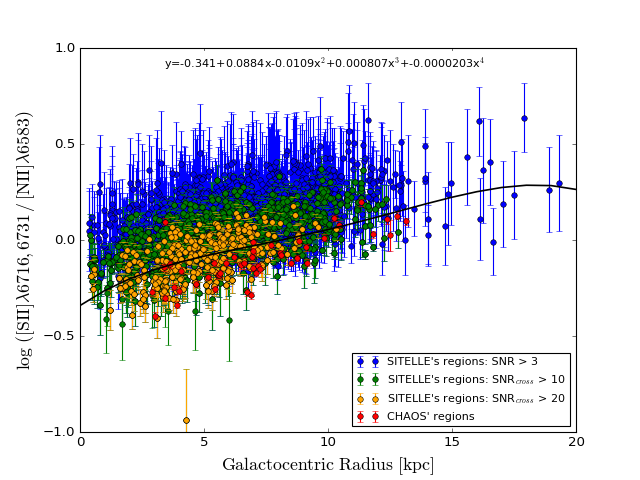

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in greater


In [25]:
%matplotlib nbagg
ms=5
elinewidth=1

sii_corr = sii2_corr+sii1_corr
sii = sii2+sii1
esii = esii2+esii1
fsii = (fsii1+fsii2)/2

k1 = -1000
k2 = 10
k3 = 20
indice = [(sii/esii > 3) & (nii2/enii2 > 3)]

yerr = abs(abs(np.log10((((sii+esii))*fsii)/(((nii2-enii2)*fnii2))))-abs(np.log10((((sii))*fsii)/(((nii2)*fnii2)))))
plt.errorbar(r[indice]/(1000), np.log10(sii_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(sii/esii > k2) | (nii2/enii2 > k2)]

plt.errorbar(r[indice]/(1000), np.log10(sii_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 10', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(sii/esii > k3) | (nii2/enii2 > k3)]
plt.errorbar(r[indice]/(1000), np.log10(sii_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 20', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)

plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/(toto[np.where(toto == 6583)[0],4])), yerr= abs(abs(np.log10(((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6716)[0],5]+toto[np.where(toto == 6730)[0],4]+toto[np.where(toto == 6730)[0],5]))/(toto[np.where(toto == 6583)[0],4]-toto[np.where(toto == 6583)[0],5])))-abs(np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/(toto[np.where(toto == 6583)[0],4])))), label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

k3=20

indice =  [(r > 15000) & (sii_corr/nii2_corr > 0) | (sii_corr/nii2_corr > 0) & (sii/esii > k3) | (nii2/enii2 > k3) & (sii_corr/nii2_corr > 0) ]
fit = np.polyfit(r[indice]/(1000), np.log10(sii_corr[indice]/nii2_corr[indice]),4)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'+'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,[NII]\lambda6583)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower right',fontsize=10)
plt.xlim(0,20)
plt.ylim(-1,1)
plt.show()    


In [51]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_SIINII_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [239]:
np.median?


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract


<IPython.core.display.Javascript object>


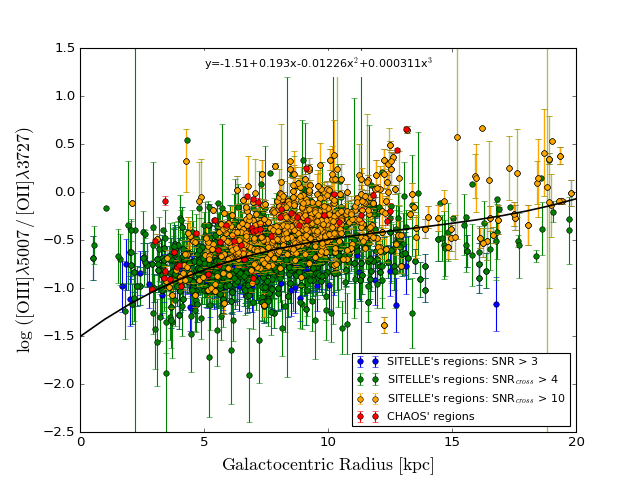

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: Runtime

In [53]:
%matplotlib nbagg
ms=5
elinewidth=1


k1 = -1000
k2 = 4
k3 = 10
indice = [(oiii2/eoiii2 > 3) & (oii/eoii > 3)]

yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((oii-eoii)*foii))))-abs(np.log10((((oiii2))*foiii2)/(((oii)*foii)))))
plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/oii_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k2) | (oii/eoii > k2)]

plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/oii_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 4', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k3) | (oii/eoii > k3)]
plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/oii_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 10', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)

plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 5006)[0],4])/(toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])), yerr= abs(abs(np.log10(((toto[np.where(toto == 5006)[0],4]+toto[np.where(toto == 5006)[0],5]))/(toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4]-toto[np.where(toto == 3726)[0],5]-toto[np.where(toto == 3728)[0],5])))-abs(np.log10((toto[np.where(toto == 5006)[0],4])/(toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])))), label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

indice =  [(oiii2_corr/oii_corr < 50000) & (oiii2_corr/oiii2_corr > 0) & (oiii2/eoii > k2) | (oiii2_corr/oii_corr < 50000) & (oii/eoii > k2) & (oiii2_corr/oii_corr > 0) ]
fit = np.polyfit(r[indice]/(1000), np.log10(oiii2_corr[indice]/oii_corr[indice]),3)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:03.2f}'.format(fitt[0])+'+'+'{:04.3f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'+'+'{:7.6f}'.format(fitt[3])+'x$^3$', xy=(0.25,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,[OII]\lambda3727)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower right',fontsize=10)
plt.xlim(0,20)
plt.ylim(-2.5,1.5)
plt.show()    



In [34]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_OIIIOII_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


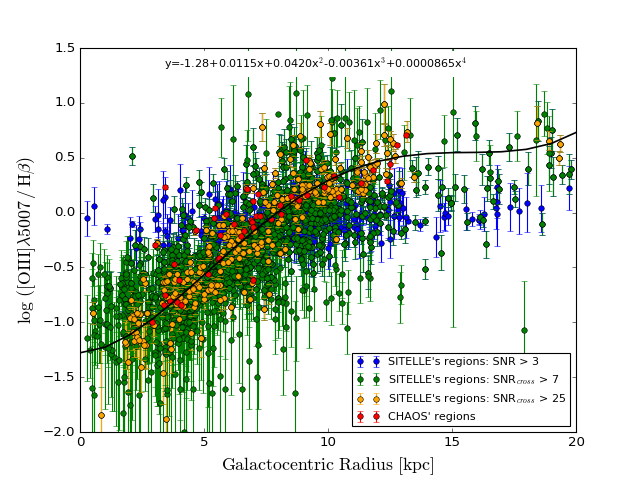

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [35]:
%matplotlib nbagg
ms=5
elinewidth=1

k2 = 7
k3 = 25
indice = [(oiii2/eoiii2 > 3) & (hb/ehb > 3)]

yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k2) | (hb/ehb > k2)]

plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 7', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k3) | (hb/ehb > k3)]
plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 25', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)
yerr = abs(abs(np.log10((toto[np.where(toto == 5006)[0],4]+(toto[np.where(toto == 5006)[0],5]))/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4])))
plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), yerr=yerr, label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k3) & (hb > 0) & (oiii2 > 0) | (hb/ehb > k3) & (hb > 0) & (oiii2 > 0)]
fit = np.polyfit(r[indice]/(1000), np.log10(oiii2_corr[indice]/hb_corr[indice]),4)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:03.2f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:06.5f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

leg = plt.legend(loc='lower right',fontsize=10)

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2,1.5)
plt.show()    


In [36]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_OIIIhb_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract


<IPython.core.display.Javascript object>


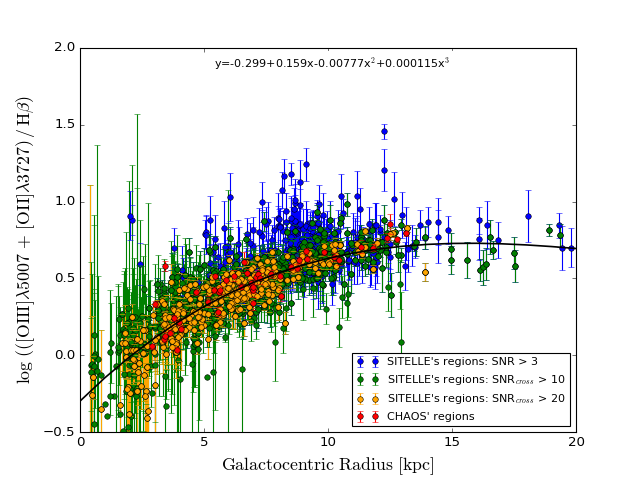

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide


In [37]:
%matplotlib nbagg
ms=5
elinewidth=1


k1 = -1000
k2 = 10
k3 = 20
indice = [(oiii2/eoiii2 > 3) & (oii/eoii > 3) & (hb/ehb > 3)]

yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)+(((oii-eoii)*foii))/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)+((oii)*foii)/(((hb-ehb)*fhb)))))
plt.errorbar(r[indice]/(1000), np.log10((oiii2_corr[indice]+oii_corr[indice])/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [((oiii2+oii)/(eoiii2+eoii) > k2) | (hb/(ehb) > k2)]

plt.errorbar(r[indice]/(1000), np.log10((oiii2_corr[indice]+oii_corr[indice])/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 10', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [((oiii2+oii)/(eoiii2+eoii) > k3) | (hb/(ehb) > k3)]
plt.errorbar(r[indice]/(1000), np.log10((oiii2_corr[indice]+oii_corr[indice])/hb_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 20', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)

plt.errorbar(toto3/7.2*9.01,np.log10(((toto[np.where(toto == 5006)[0],4])+toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4]), yerr= abs(abs(np.log10((((toto[np.where(toto == 5006)[0],4]+toto[np.where(toto == 5006)[0],5]))+(toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4]+toto[np.where(toto == 3726)[0],5]+toto[np.where(toto == 3728)[0],5]))/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10(((toto[np.where(toto == 5006)[0],4])+toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4]))), label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

indice =  [((oiii2_corr+oii_corr)/hb_corr < 50000) & ((oiii2_corr+oii_corr)/hb_corr > 0) & (hb/(ehb) > k2) | ((oiii2_corr+oii_corr)/hb_corr < 50000) & ((oiii2+oii)/(eoiii2+eoii) > k2) & ((oiii2_corr+oii_corr)/hb_corr > 0) ]
fit = np.polyfit(r[indice]/(1000), np.log10(((oiii2_corr[indice]+oii_corr[indice]))/hb_corr[indice]),3)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:04.3f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'+'+'{:7.6f}'.format(fitt[3])+'x$^3$', xy=(0.27,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,(([OIII]\lambda5007\,+\,[OII]\lambda3727)\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower right',fontsize=10)
plt.xlim(0,20)
plt.ylim(-0.5,2)
plt.show()    


In [38]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_OIIIOIIhb_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in subtract


<IPython.core.display.Javascript object>


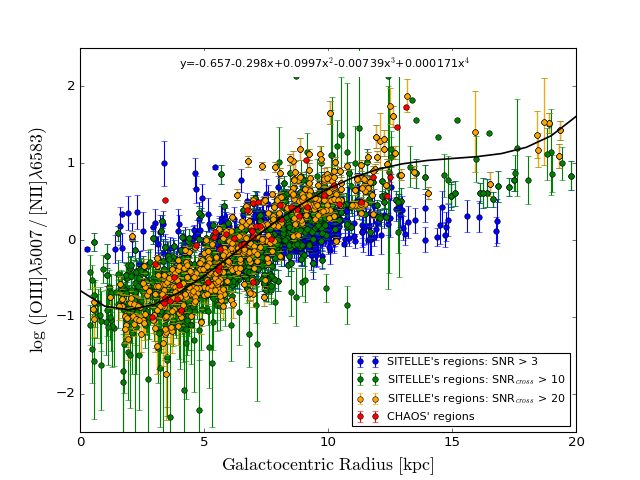

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [39]:
%matplotlib nbagg
ms=5
elinewidth=1

k2 = 10
k3 = 20
indice = [(oiii2/eoiii2 > 3) & (nii2/enii2 > 3)]

yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((nii2-enii2)*fnii2))))-abs(np.log10((((oiii2))*foiii2)/(((nii2)*fnii2)))))
plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k2) | (nii2/enii2 > k2)]

plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 10', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k3) | (nii2/enii2 > k3)]
plt.errorbar(r[indice]/(1000), np.log10(oiii2_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 20', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)
yerr = abs(abs(np.log10((toto[np.where(toto == 5006)[0],4]+(toto[np.where(toto == 5006)[0],5]))/(toto[np.where(toto == 6583)[0],4]-toto[np.where(toto == 6583)[0],5])))-abs(np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 6583)[0],4])))
plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 6583)[0],4]), yerr=yerr, label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

indice = [(oiii2/eoiii2 > k3) & (nii2 > 0) & (oiii2 > 0) | (nii2/enii2 > k3) & (nii2 > 0) & (oiii2 > 0)]
fit = np.polyfit(r[indice]/(1000), np.log10(oiii2_corr[indice]/nii2_corr[indice]),4)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'{:04.3f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:06.5f}'.format(fitt[3])+'x$^3$'+'+'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.2,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

leg = plt.legend(loc='lower right',fontsize=10)

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,[NII]\lambda6583)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.5,2.5)
plt.show()    


In [40]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_OIIINII_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


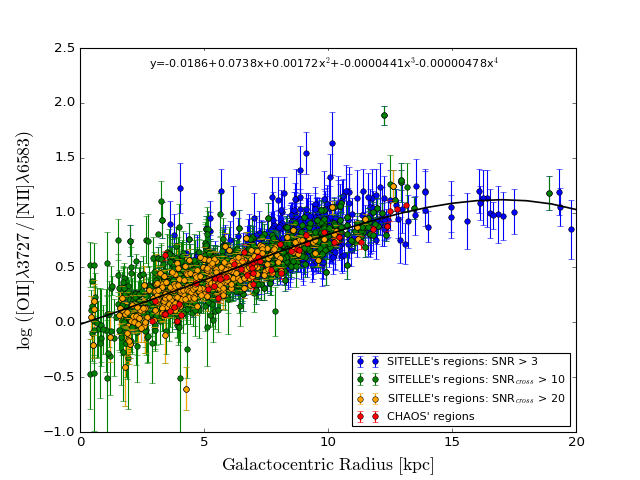

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in greater


In [57]:
%matplotlib nbagg
ms=5
elinewidth=1


k1 = -1000
k2 = 10
k3 = 20
indice = [(oii/eoii > 3) & (nii2/enii2 > 3)]

yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((nii2-enii2)*fnii2))))-abs(np.log10((((oii))*foii)/(((nii2)*fnii2)))))
plt.errorbar(r[indice]/(1000), np.log10(oii_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 3', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(oii/eoii > k2) | (nii2/enii2 > k2)]

plt.errorbar(r[indice]/(1000), np.log10(oii_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 10', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(oii/eoii > k3) | (nii2/enii2 > k3)]
plt.errorbar(r[indice]/(1000), np.log10(oii_corr[indice]/nii2_corr[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR$_{cross}$ > 20', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)

plt.errorbar(toto3/7.2*9.01,np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 6583)[0],4]), yerr= abs(abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4]+(toto[np.where(toto == 3726)[0],5]+toto[np.where(toto == 3728)[0],5]))/(toto[np.where(toto == 6583)[0],4]-toto[np.where(toto == 6583)[0],5])))-abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 6583)[0],4]))), label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)


indice =  [(oii_corr/nii2_corr > 0) & (r > 15000) | (oii_corr/nii2_corr > 0) & (oii/eoii > k2) | (nii2/enii2 > k2) & (oii_corr/nii2_corr > 0) ]
fit = np.polyfit(r[indice]/(1000), np.log10(oii_corr[indice]/nii2_corr[indice]),4)
fitt = np.poly1d(fit)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'+'+'{:08.7f}'.format(fitt[3])+'x$^3$'+'{:09.8f}'.format(fitt[4])+'x$^4$', xy=(0.14,0.95),xycoords='axes fraction',\
            fontsize=10.0, color='k', backgroundcolor='w')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,[NII]\lambda6583)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower right',fontsize=10)
plt.xlim(0,20)
plt.ylim(-1,2.5)
plt.show()    


In [58]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_OIINII_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


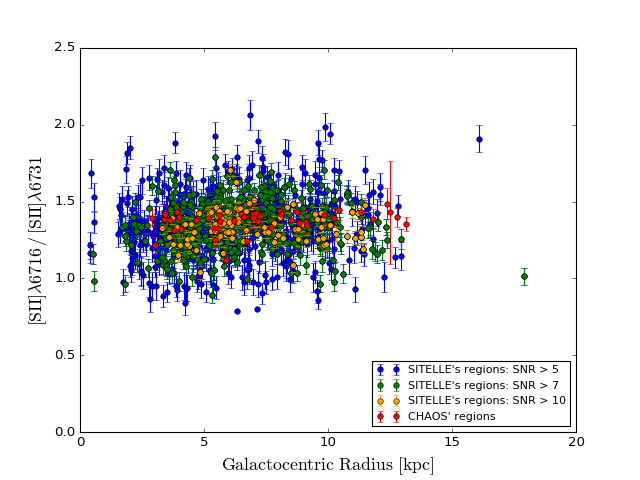

In [112]:
%matplotlib nbagg
ms=5
elinewidth=1

k2 = 7
k3 = 10
indice = [(sii1/esii1 > 5) & (sii2/esii2 > 5)]

yerr = abs(abs(np.log10((((sii1+esii1))*fsii)/(((sii2-esii2)*fsii))))-abs(np.log10((((sii1+esii1))*fsii)/(((sii2)*fsii)))))
plt.errorbar(r[indice]/(1000), (sii1[indice]/sii2[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 5', fmt='o', ms=ms, elinewidth=elinewidth)

indice = [(sii1/esii1 > k2) & (sii2/esii2 > k2)]

plt.errorbar(r[indice]/(1000), (sii1[indice]/sii2[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 7', fmt='o', c='g', ms=ms, elinewidth=elinewidth)

indice = [(sii1/esii1 > k3) & (sii2/esii2 > k3)]
plt.errorbar(r[indice]/(1000), (sii1[indice]/sii2[indice]), yerr=yerr[indice], label='SITELLE\'s regions: SNR > 10', fmt='o', c='orange', ms=ms, elinewidth=elinewidth)
yerr = abs(abs(((toto[np.where(toto == 6716)[0],4]+(toto[np.where(toto == 6716)[0],5]))/(toto[np.where(toto == 6730)[0],4]-toto[np.where(toto == 6730)[0],5])))-abs(((toto[np.where(toto == 6716)[0],4])/toto[np.where(toto == 6730)[0],4])))
plt.errorbar(toto3/7.2*9.01,((toto[np.where(toto == 6716)[0],4])/toto[np.where(toto == 6730)[0],4]), yerr=yerr, label='CHAOS\' regions', fmt='o', c='r', ms=ms, elinewidth=elinewidth)

#indice = [(sii1/esii2 > k3) & (sii1/sii2 > 0) & (sii1/sii2 < 2) & (sii2/esii1 > k3)]
#fit = np.polyfit(r[indice]/(1000), (sii1[indice]/sii2[indice]),2)
#fitt = np.poly1d(fit)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
#plt.annotate('y='+'{:03.2f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$', xy=(0.35,0.95),xycoords='axes fraction',\
#            fontsize=10.0, color='k', backgroundcolor='w')

leg = plt.legend(loc='lower right',fontsize=10)

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{[SII]\lambda6716\,/\,[SII]\lambda6731}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(0,2.5)
plt.show()    


In [113]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_SIISII_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


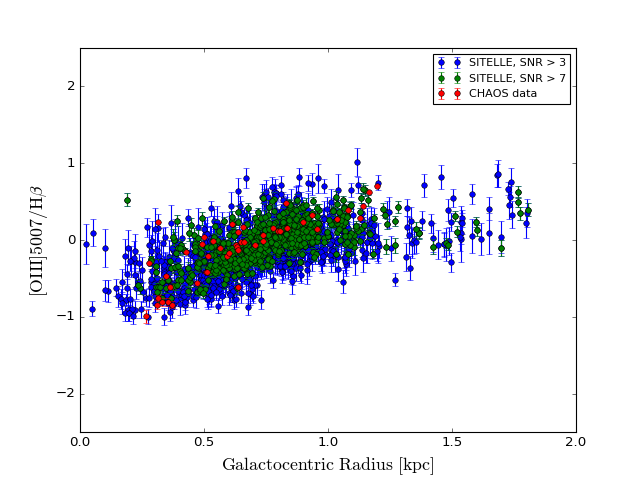

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater


In [291]:
%matplotlib nbagg

indice = [(np.log10(hb) > -17)]
indice = [(oiii2/eoiii2 > 3) & (hb/ehb > 3)]

cmin = 8
cmax = 9.5

plt.scatter(r[indice]/(10.95*1000), np.log10(flux_oiii2[indice]/flux_hb[indice]), marker='.', linewidths = 0.0, s = 40)
plt.errorbar(r[indice]/(10.95*1000), np.log10(flux_oiii2[indice]/flux_hb[indice]), yerr= np.log10((((oiii2[indice]+eoiii2[indice]))*foiii2[indice])/(((hb[indice]-ehb[indice])*fhb[indice])))-np.log10((((oiii2[indice]))*foiii2[indice])/(((hb[indice])*fhb[indice]))), ms=5, fmt='o', label='SITELLE, SNR > 3')
plt.clim(cmin,cmax)

indice = [(oiii2/eoiii2 > 7) & (hb/ehb > 7)]
#indice = [(np.log10(hb) > -16.5)]
plt.errorbar(r[indice]/(10.95*1000), np.log10(flux_oiii2[indice]/flux_hb[indice]), yerr= np.log10((((oiii2[indice]+eoiii2[indice]))*foiii2[indice])/(((hb[indice]-ehb[indice])*fhb[indice])))-np.log10((((oiii2[indice]))*foiii2[indice])/(((hb[indice])*fhb[indice]))), c='g', ms=5, fmt='o', label='SITELLE, SNR > 7')
indice = [(np.log10(ha) > -15)]
#plt.errorbar(r[indice]/(10.95*1000), np.log10(flux_oiii2[indice]/flux_hb[indice]), yerr= np.log10((((oiii2[indice]+eoiii2[indice]))*foiii2[indice])/(((hb[indice]-ehb[indice])*fhb[indice])))-np.log10((((oiii2[indice]))*foiii2[indice])/(((hb[indice])*fhb[indice]))), c='orange', fmt='o',ms=5, label='SITELLE, log FH'+r'$\mathrm{\alpha}$'+' > -15')

plt.scatter(toto3/10.95/7.2*9.01,np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), marker='.', c='r', linewidths = 0.0, s = 40)

plt.errorbar(toto3/10.95/7.2*9.01,np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), yerr= np.log10((toto[np.where(toto == 5006)[0],4]+toto[np.where(toto == 5006)[0],5])/(toto[np.where(toto == 4861)[0],4])-toto[np.where(toto == 4861)[0],5])-np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), ms=5, fmt='o', c='r', label='CHAOS data')
leg = plt.legend(loc='upper right',fontsize=10)

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{[OIII]5007/H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,2)
plt.ylim(-2.5,2.5)
plt.show()    


In [ ]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_selection_bias.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [ ]:
indice = [np.where(np.log10(ha) > -16)]

print indice

In [ ]:
%matplotlib nbagg

indice = [np.where(np.log10(ha) > -16)]
cmin = 8
cmax = 9.5


indice = [(sii1/esii1 > 8) & (sii2/esii2 > 8)]
#indice = [(sig < 50) & (sig > 40) & (np.log10(ha) > -14)]

plt.scatter(r[indice]/(10.95*1000), (sii1_corr[indice]/sii2_corr[indice]), marker='.', linewidths = 0.0, s = 40)
plt.errorbar(r[indice]/(10.95*1000), (sii1_corr[indice]/sii2_corr[indice]), yerr= ((((sii1[indice]+esii1[indice]))*fsii1[indice])/(((sii2[indice]-esii2[indice])*fsii2[indice])))-((((sii1[indice]))*fsii1[indice])/(((sii2[indice])*fsii2[indice]))), fmt='o')
plt.clim(cmin,cmax)

indice = [(sii1/esii1 > 10) & (sii2/esii2 > 10)]
plt.errorbar(r[indice]/(10.95*1000), (sii1_corr[indice]/sii2_corr[indice]), yerr= ((((sii1[indice]+esii1[indice]))*fsii1[indice])/(((sii2[indice]-esii2[indice])*fsii2[indice])))-((((sii1[indice]))*fsii1[indice])/(((sii2[indice])*fsii2[indice]))), fmt='o')

plt.scatter(toto3/10.95/7.2*9.01,(toto[np.where(toto == 6716)[0],4]/toto[np.where(toto == 6730)[0],4]), marker='.', c='r', linewidths = 0.0, s = 40)

plt.errorbar(toto3/10.95/7.2*9.01, (toto[np.where(toto == 6716)[0],4]/toto[np.where(toto == 6730)[0],4]), yerr=((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6716)[0],5])/(toto[np.where(toto == 6730)[0],4])-toto[np.where(toto == 6730)[0],5])-((toto[np.where(toto == 6716)[0],4])/(toto[np.where(toto == 6730)[0],4])), fmt='o', c='r')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{12+log\,\,[O/H]}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,2)
plt.ylim(0,2)
plt.show()    


In [189]:
cat = fits.getdata('NGC628_regions_category.fits')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


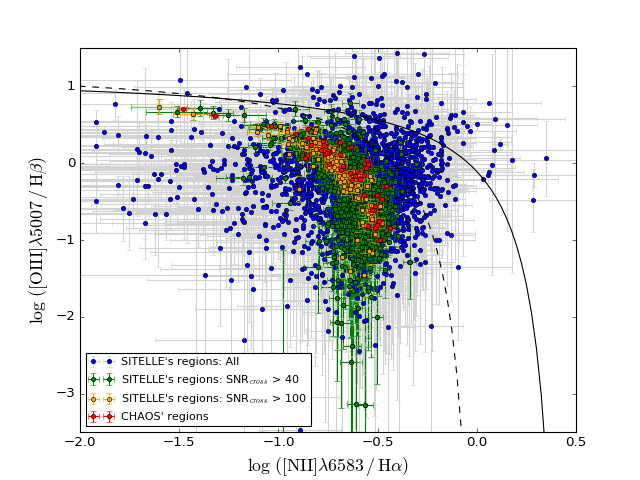

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarn

In [114]:
%matplotlib nbagg

ms=4
elinewidth=1

k=-1000
xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = np.arange(4285)#[(oiii2/ehb > k) | (hb/eoiii2 > k) & (nii2/eha > k)  | (ha/enii2 > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40)
plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), ecolor='#D3D3D3', label='SITELLE\'s regions: All',yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='b', elinewidth=elinewidth, ms=ms)

#xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
#yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
#indice= [(nii2/enii2 > 2) & (oiii2/eoiii2 > 2) & (hb/ehb > 2) & (ha/eha > 2)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')
#plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g')

k=40
xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = [(oiii2/eoiii2 > k) | (hb/ehb > k) & (nii2/enii2 > k)  | (ha/eha > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')


plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 40', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g',elinewidth=elinewidth, ms=ms)

k=100
xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = [(oiii2/eoiii2 > k) | (hb/ehb > k) & (nii2/enii2 > k)  | (ha/eha > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')


plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 100', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange',elinewidth=elinewidth, ms=ms)


#xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
#yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
#indice= [(ha/eha > 50)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='orange')
#
#
#plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange')
#


#plt.scatter(np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4]), np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), marker='.', c='r', linewidths = 0.0, s = 40)
x = np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4])
y = np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4])
xerr = abs(abs(np.log10((toto[np.where(toto == 6583)[0],4]+toto[np.where(toto == 6583)[0],5])/(toto[np.where(toto == 6562)[0],4]-toto[np.where(toto == 6562)[0],5])))-abs(np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4])))
yerr = abs(abs(np.log10((toto[np.where(toto == 5006)[0],4]+toto[np.where(toto == 5006)[0],5])/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4])))
plt.errorbar(x, y, xerr=xerr , yerr=yerr, label='CHAOS\' regions', fmt='o', c='r',elinewidth=elinewidth, ms=ms)

    
    
# Show the boundary between the regions:
plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)
plt.xlabel('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(-2,0.5)
plt.ylim(-3.5,1.5)
plt.show()

In [115]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_BPT_OIIINII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


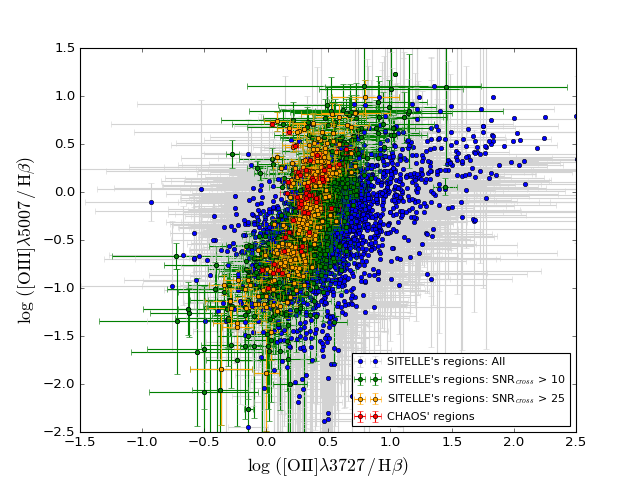

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: Runtim

In [116]:
%matplotlib nbagg
ms=4
elinewidth=1

k=-1000
xerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = np.arange(4285)#[(oiii2/ehb > k) | (hb/eoiii2 > k) & (nii2/eha > k)  | (ha/enii2 > k)]
plt.errorbar(np.log10(oii_corr[indice]/hb_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), ecolor='#D3D3D3', label='SITELLE\'s regions: All',yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='b', elinewidth=elinewidth, ms=ms)

k=10
xerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = [(oiii2/eoiii2 > k) | (hb/ehb > k) & (oii/eoii > k)  | (hb/ehb > k)]
plt.errorbar(np.log10(oii_corr[indice]/hb_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 10', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g',elinewidth=elinewidth, ms=ms)

k=25
xerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = [(oiii2/eoiii2 > k) | (hb/ehb > k) & (oii/eoii > k)  | (hb/ehb > k)]
plt.errorbar(np.log10(oii_corr[indice]/hb_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 25', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange',elinewidth=elinewidth, ms=ms)


#xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
#yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
#indice= [(ha/eha > 50)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='orange')
#
#
#plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange')
#


#plt.scatter(np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4]), np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), marker='.', c='r', linewidths = 0.0, s = 40)
x = np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4])
y = np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4])
xerr = abs(abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3726)[0],5]+toto[np.where(toto == 3728)[0],4]+toto[np.where(toto == 3728)[0],5])/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4])))
yerr = abs(abs(np.log10((toto[np.where(toto == 5006)[0],4]+toto[np.where(toto == 5006)[0],5])/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4])))
plt.errorbar(x, y, xerr=xerr , yerr=yerr, label='CHAOS\' regions', fmt='o', c='r',elinewidth=elinewidth, ms=ms)

    
# Show the boundary between the regions:
#plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
#plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)
plt.xlabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
leg = plt.legend(loc='lower right',fontsize=10)
plt.xlim(-1.5,2.5)
plt.ylim(-2.5,1.5)
plt.show()

In [117]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_BPT_OIIIOII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


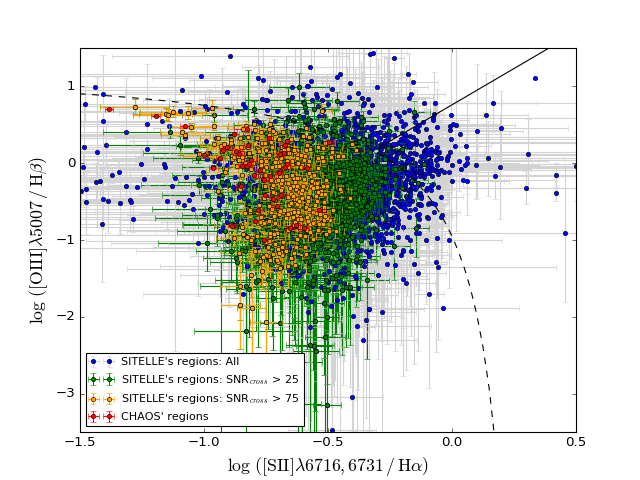

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarn

In [122]:
%matplotlib nbagg
sii_corr = sii2_corr+sii1_corr
sii = sii2+sii1
esii = esii2+esii1
fsii = (fsii1+fsii2)/2
ms=4
elinewidth=1

k=-1000
xerr = abs(abs(np.log10((((sii+esii))*fsii)/(((ha-eha)*fha))))-abs(np.log10((((sii))*fsii)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = np.arange(4285)#[(oiii2/ehb > k) | (hb/eoiii2 > k) & (nii2/eha > k)  | (ha/enii2 > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40)
plt.errorbar(np.log10(sii_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), ecolor='#D3D3D3', label='SITELLE\'s regions: All',yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='b', elinewidth=elinewidth, ms=ms)

#xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
#yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
#indice= [(nii2/enii2 > 2) & (oiii2/eoiii2 > 2) & (hb/ehb > 2) & (ha/eha > 2)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')
#plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g')

k=25
xerr = abs(abs(np.log10((((sii+esii))*fsii)/(((ha-eha)*fha))))-abs(np.log10((((sii))*fsii)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = [(oiii2/eoiii2 > k) | (hb/ehb > k) & (sii/esii > k)  | (ha/eha > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')


plt.errorbar(np.log10(sii_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 25', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g',elinewidth=elinewidth, ms=ms)

k=75
xerr = abs(abs(np.log10((((sii+esii))*fsii)/(((ha-eha)*fha))))-abs(np.log10((((sii))*fsii)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
indice = [(oiii2/eoiii2 > k) | (hb/ehb > k) & (sii/esii > k)  | (ha/eha > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')


plt.errorbar(np.log10(sii_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 75', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange',elinewidth=elinewidth, ms=ms)


#xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
#yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
#indice= [(ha/eha > 50)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='orange')
#
#
#plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange')
#


#plt.scatter(np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4]), np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), marker='.', c='r', linewidths = 0.0, s = 40)
x = np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/toto[np.where(toto == 6562)[0],4])
y = np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4])
xerr = abs(abs(np.log10(((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6716)[0],5]+toto[np.where(toto == 6730)[0],4]+toto[np.where(toto == 6730)[0],5]))/(toto[np.where(toto == 6562)[0],4]-toto[np.where(toto == 6562)[0],5])))-abs(np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/toto[np.where(toto == 6562)[0],4])))
yerr = abs(abs(np.log10((toto[np.where(toto == 5006)[0],4]+toto[np.where(toto == 5006)[0],5])/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4])))
plt.errorbar(x, y, xerr=xerr , yerr=yerr, label='CHAOS\' regions', fmt='o', c='r',elinewidth=elinewidth, ms=ms)

    
    
# Show the boundary between the regions:
plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)
plt.xlabel('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(-1.5,0.5)
plt.ylim(-3.5,1.5)
plt.show()

In [123]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_BPT_OIIISII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


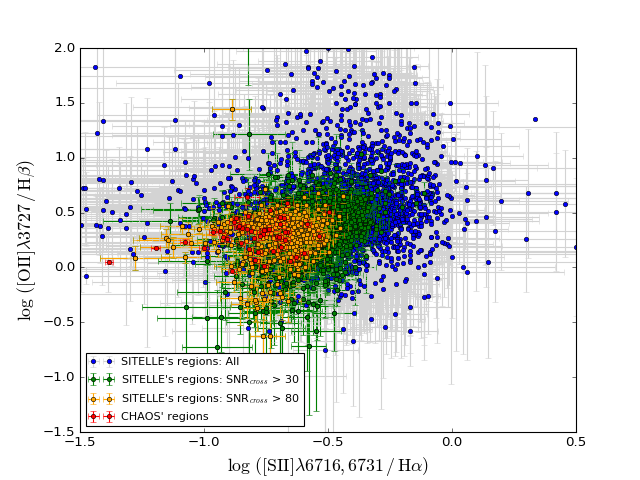

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: Runtim

In [130]:
%matplotlib nbagg
sii_corr = sii2_corr+sii1_corr
sii = sii2+sii1
esii = esii2+esii1
fsii = (fsii1+fsii2)/2
ms=4
elinewidth=1

k=-1000
xerr = abs(abs(np.log10((((sii+esii))*fsii)/(((ha-eha)*fha))))-abs(np.log10((((sii))*fsii)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
indice = np.arange(4285)#[(oiii2/ehb > k) | (hb/eoiii2 > k) & (nii2/eha > k)  | (ha/enii2 > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40)
plt.errorbar(np.log10(sii_corr[indice]/ha_corr[indice]), np.log10(oii_corr[indice]/hb_corr[indice]), ecolor='#D3D3D3', label='SITELLE\'s regions: All',yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='b', elinewidth=elinewidth, ms=ms)

#xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
#yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
#indice= [(nii2/enii2 > 2) & (oiii2/eoiii2 > 2) & (hb/ehb > 2) & (ha/eha > 2)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')
#plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g')

k=30
xerr = abs(abs(np.log10((((sii+esii))*fsii)/(((ha-eha)*fha))))-abs(np.log10((((sii))*fsii)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
indice = [(oii/eoii > k) | (hb/ehb > k) & (sii/esii > k)  | (ha/eha > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')


plt.errorbar(np.log10(sii_corr[indice]/ha_corr[indice]), np.log10(oii_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 30', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g',elinewidth=elinewidth, ms=ms)

k=80
xerr = abs(abs(np.log10((((sii+esii))*fsii)/(((ha-eha)*fha))))-abs(np.log10((((sii))*fsii)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
indice = [(oii/eoii > k) | (hb/ehb > k) & (sii/esii > k)  | (ha/eha > k)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='g')


plt.errorbar(np.log10(sii_corr[indice]/ha_corr[indice]), np.log10(oii_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 80', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange',elinewidth=elinewidth, ms=ms)


#xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
#yerr = abs(abs(np.log10((((oiii2+eoiii2))*foiii2)/(((hb-ehb)*fhb))))-abs(np.log10((((oiii2))*foiii2)/(((hb)*fhb)))))
#indice= [(ha/eha > 50)]
#plt.scatter(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), marker='.', linewidths = 0.0, s = 40, c='orange')
#
#
#plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oiii2_corr[indice]/hb_corr[indice]), yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange')
#


#plt.scatter(np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4]), np.log10((toto[np.where(toto == 5006)[0],4])/toto[np.where(toto == 4861)[0],4]), marker='.', c='r', linewidths = 0.0, s = 40)
x = np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/toto[np.where(toto == 6562)[0],4])
y = np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4])
xerr = abs(abs(np.log10(((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6716)[0],5]+toto[np.where(toto == 6730)[0],4]+toto[np.where(toto == 6730)[0],5]))/(toto[np.where(toto == 6562)[0],4]-toto[np.where(toto == 6562)[0],5])))-abs(np.log10((toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/toto[np.where(toto == 6562)[0],4])))
yerr = abs(abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3726)[0],5]+toto[np.where(toto == 3728)[0],4]+toto[np.where(toto == 3728)[0],5])/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4])))
plt.errorbar(x, y, xerr=xerr , yerr=yerr, label='CHAOS\' regions', fmt='o', c='r',elinewidth=elinewidth, ms=ms)

    
    
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)
plt.xlabel('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(-1.5,0.5)
plt.ylim(-1.5,2)
plt.show()

In [131]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_BPT_OIISII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


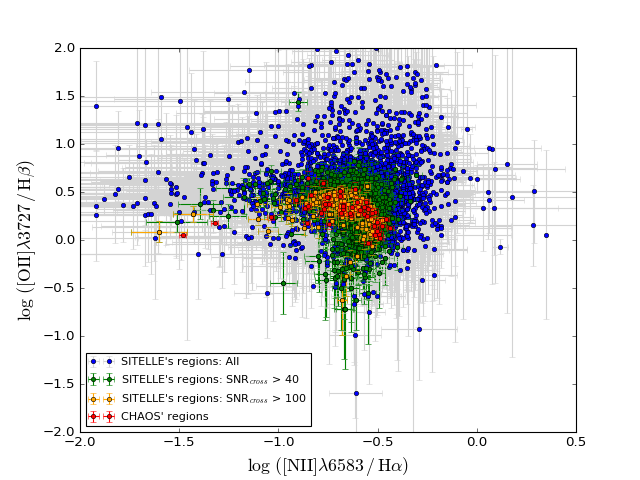

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: Runtim

In [127]:
%matplotlib nbagg

ms=4
elinewidth=1

k=-1000
xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
indice = np.arange(4285)#[(oiii2/ehb > k) | (hb/eoiii2 > k) & (nii2/eha > k)  | (ha/enii2 > k)]
plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oii_corr[indice]/hb_corr[indice]), ecolor='#D3D3D3', label='SITELLE\'s regions: All',yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='b', elinewidth=elinewidth, ms=ms)

k=40
xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
indice = [(oii/eoii > k) | (hb/ehb > k) & (nii2/enii2 > k)  | (ha/eha > k)]
plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oii_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 40',yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='g', elinewidth=elinewidth, ms=ms)

k=100
xerr = abs(abs(np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha))))-abs(np.log10((((nii2))*fnii2)/(((ha)*fha)))))
yerr = abs(abs(np.log10((((oii+eoii))*foii)/(((hb-ehb)*fhb))))-abs(np.log10((((oii))*foii)/(((hb)*fhb)))))
indice = [(oii/eoii > k) | (hb/ehb > k) & (nii2/enii2 > k)  | (ha/eha > k)]
plt.errorbar(np.log10(nii2_corr[indice]/ha_corr[indice]), np.log10(oii_corr[indice]/hb_corr[indice]), label='SITELLE\'s regions: SNR$_{cross}$ > 100', yerr=yerr[indice], xerr=xerr[indice], fmt='o', c='orange',elinewidth=elinewidth, ms=ms)

x = np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4])
y = np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4])
xerr = abs(abs(np.log10((toto[np.where(toto == 6583)[0],4]+toto[np.where(toto == 6583)[0],5])/(toto[np.where(toto == 6562)[0],4]-toto[np.where(toto == 6562)[0],5])))-abs(np.log10((toto[np.where(toto == 6583)[0],4])/toto[np.where(toto == 6562)[0],4])))
yerr = abs(abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3726)[0],5]+toto[np.where(toto == 3728)[0],4]+toto[np.where(toto == 3728)[0],5])/(toto[np.where(toto == 4861)[0],4]-toto[np.where(toto == 4861)[0],5])))-abs(np.log10((toto[np.where(toto == 3726)[0],4]+toto[np.where(toto == 3728)[0],4])/toto[np.where(toto == 4861)[0],4])))
plt.errorbar(x, y, xerr=xerr , yerr=yerr, label='CHAOS\' regions', fmt='o', c='r',elinewidth=elinewidth, ms=ms)

    
    
# Show the boundary between the regions:
#plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
#plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)
plt.xlabel('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(-2,0.5)
plt.ylim(-2,2)
plt.show()

In [128]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_regions_BPT_OIINII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


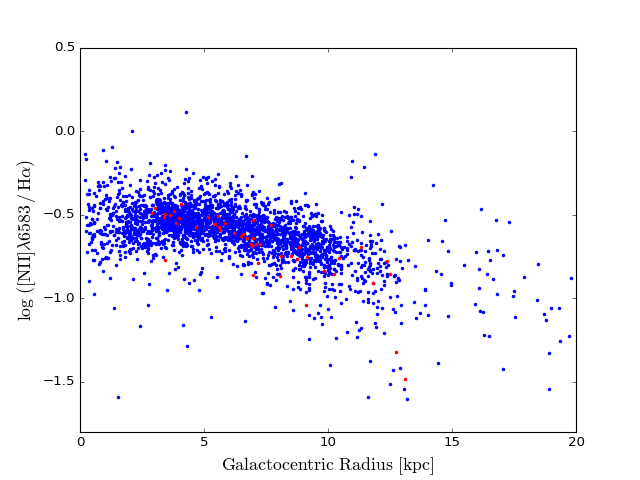

In [302]:
%matplotlib nbagg

indice = [(np.log10(ha) > -16)]
cmin = -2
cmax = 1

#
plt.scatter(r[indice]/1000, np.log10((nii2[indice]*fnii2[indice])/(((ha[indice])*fha[indice]))), marker='.', linewidths = 0.0, s = 40)
plt.scatter(toto3/7.2*9.006,np.log10(toto[np.where(toto == 6583)[0],4]/toto[np.where(toto == 6562)[0],4]), marker='.', c='r', linewidths = 0.0, s = 40)
plt.clim(cmin,cmax)


plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,([NII]\lambda6583\,/\,H\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.8,0.5)
plt.show()    

In [ ]:
print (toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])/toto[np.where(toto == 6562)[0],4]
print toto[np.where(toto == 6583)[0],4]/(toto[np.where(toto == 6716)[0],4]+toto[np.where(toto == 6730)[0],4])

In [ ]:
%matplotlib nbagg
sii_corr = sii2_corr+sii1_corr
sii = sii2+sii1
esii = esii2+esii1

print np.where((sii/esii > 5) & (nii2/enii2 > 5))[0][500:600] 
i=2129
print [nii2[i],sii1[i],sii2[i]]
print sii1[i]/sii2[i]
print (sii1[i]+sii2[i])*fha[i]/(ha[i]*fha[i])
sii_corr[i] = sii2_corr[i]+sii1_corr[i]
print np.log10(nii2_corr[i]/sii_corr[i])
plt.plot(sp3[150:250,i], c='k')
plt.plot(sp3_fit[150:250,i], '--', c='r')
plt.show()




In [ ]:
grow = pyfits.getdata('NGC628_HIIPhot3_All_GROW.fits')
dist = pyfits.getdata('NGC628_distance_grow.fits')
hdr = pyfits.open('NGC628_SN3.merged.astro.fits')
h = hdr[0].header
#pyfits.writeto('NGC628_HIIPhot3_All_GROW_SN3.fits', grow, h)
#pyfits.writeto('NGC628_distance_GROW.fits', dist, h)

In [ ]:
print len(np.where(dist < 60)[0])

In [ ]:
cat = fits.getdata('NGC628_regions_category.fits')


In [ ]:
print len(np.where(cat[(r < 6500)] == 1)[0])
print len(np.where(cat[(r < 6500)] == 2)[0])
print len(np.where(cat[(r < 6500)] == 3)[0])
print len(np.where(cat[(r < 6500)] == 4)[0])
print len(np.where(cat[(r > 6500)] == 1)[0])
print len(np.where(cat[(r > 6500)] == 2)[0])
print len(np.where(cat[(r > 6500)] == 3)[0])
print len(np.where(cat[(r > 6500)] == 4)[0])

In [ ]:
regxy = np.loadtxt('Region_xy_centroid.reg')
regx  = np.zeros(4285)
regy  = np.zeros(4285)

for i in range(0,4285):
    regx[i] = np.float(regxy[i,0])
    regy[i] = np.float(regxy[i,1])
print len(regx)

In [ ]:
d_p = np.zeros(4285)
d_p2 = np.zeros(4285)
d_p3 = np.zeros(4285)

In [ ]:
for i in range(0,4285):
    
    d_temp = ((regx[i]*np.ones([4285])-regx)**2+(regy[i]*np.ones([4285])-regy)**2)**0.5
    d_p[i] = np.min(d_temp[(d_temp > 0)])*14
    d_p2[i] = np.min(d_temp[(d_temp > np.min(d_temp[(d_temp > 0)]))])*14
    d_p3[i] = np.min(d_temp[(d_temp > np.min(d_temp[(d_temp > np.min(d_temp[(d_temp > 0)]))]))])*14

In [ ]:
print d_p
print d_p2
print d_p3

In [ ]:
print np.median(d_p[(r < 6500)])
print np.median(d_p[(r > 6500)])

print np.median(d_p2[(r < 6500)])
print np.median(d_p2[(r > 6500)])

print np.median(d_p3[(r < 6500)])
print np.median(d_p3[(r > 6500)])


In [115]:
back = fits.getdata('NGC628_background.regions.fits')
back[(np.isfinite(back) == False)] = 0


In [ ]:
print np.median(back[(r < 6500)])/0.322
print np.median(back[(r > 6500)])


print np.median(d_p[(back < np.median(back))])
print np.median(d_p[(back > np.median(back))])

flux_tot[(np.isfinite(flux_tot) == False)] =0
print np.median(flux_tot[(d_p < 100)])
print np.median(flux_tot[(d_p > 100)])

In [93]:
flux_tott2= fits.open('NGC628_flux_tot_regions2.fits')
flux_tott2.info()
flux_tot2 = flux_tott2[0].data
flux_tott2.close()
lumi2 = flux_tot2*4*3.1415926*(9.006*1000000*3.085678e18)**2 # luminosité


Filename: NGC628_flux_tot_regions2.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       5   (4285,)      float64   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


<IPython.core.display.Javascript object>


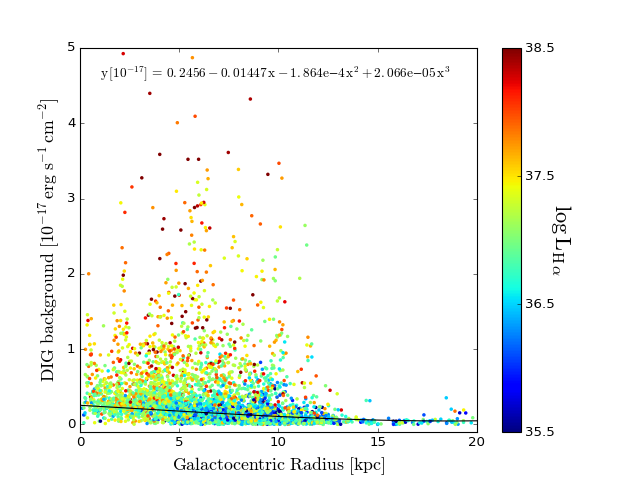

0.254693133858
-0.0150070740399
-0.000193351041518
2.14206714193e-05


In [116]:
%matplotlib nbagg

plt.scatter(r[(back > 0)]/1000, back[(back > 0)]/1e-17, c = np.log10(lumi2[(back > 0)]), s=10, edgecolor='', linewidth=0.1)

plt.ylabel('$\mathrm{DIG\,\,background\,\,[10^{-17}\,erg\,\,s^{-1}\,cm^{-2}]}$', fontname='Helvetica',fontsize=16,)
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
cbar=plt.colorbar(ticks=[35.5,36.5,37.5,38.5,39.5],pad=0.05)

m3,m2,m,b = np.polyfit(r[(back > 0) & (back < 0.35e-17)]/1000, back[(back > 0) & (back < 0.35e-17)]/1e-17, 3) 
print b
print m
print m2
print m3
plt.plot(np.arange(21),(m3* np.arange(21)**3+m2* np.arange(21)**2+m* np.arange(21)+b), '-', linewidth = 1, c='k' ) 

#cbar.set_label('$\mathrm{Log\,\,H}$'+'$.r\mathrm{\alpha$}'+'luminosity$', rotation=270, fontsize=20, fontname = 'Helvetica', labelpad=16)
cbar.set_label('$\mathrm{log\,L_H}$'+r'$_\alpha$', rotation=270, fontsize=20, fontname = 'Helvetica', labelpad=16)
plt.clim(35.5,38.5)
plt.annotate('$\mathrm{y\,[10^{-17}]\,=\,0.2456-0.01447\,x-1.864e\minus4\,x^2+2.066e\minus05\,x^3}$',xy=(0.05,0.92),xycoords='axes fraction',\
            fontsize=12.0, color='k')
0.245643622794
-0.0144738571428
-0.000186481078583
2.06595727588e-05
plt.xlim(0,20)
plt.ylim(-0.1,5)

plt.show()

In [ ]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_DIG_vs_radius_vs_lumi.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [ ]:
map_morph = np.zeros([2064,2048])
for i in range(0,4285):
    map_morph[(np.where(grow == i+1))] = cat[i]
    

In [ ]:
fits.writeto('NGC628_regions_cat_map.fits', map_morph)

In [91]:
size = fits.getdata('NGC628_regions_size.fits')
print size

[  76.           76.           90.         ...,   57.93116605   80.          118.        ]


In [141]:
plt.hist?

<IPython.core.display.Javascript object>


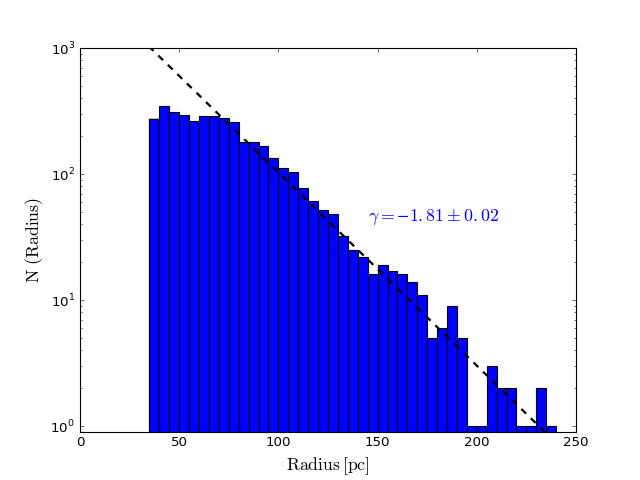

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


44
43
[  35.   40.   45.   50.   55.   60.   65.   70.   75.   80.   85.   90.
   95.  100.  105.  110.  115.  120.  125.  130.  135.  140.  145.  150.
  155.  160.  165.  170.  175.  180.  185.  190.  195.  200.  205.  210.
  215.  220.  225.  230.  235.  240.  245.  250.]
[ 272.  345.  310.  293.  265.  287.  288.  278.  258.  180.  180.  167.
  135.  111.  103.   78.   61.   52.   48.   32.   25.   22.   16.   19.
   17.   16.   14.   11.    5.    6.    9.    5.    1.    1.    3.    2.
    2.    1.    1.    2.    1.    0.    0.]
3.54450390483
-1.8147585902


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in greater


In [94]:
%matplotlib nbagg
l=8
k=0
# L detection thresold 
#y=plt.hist(lumi2[(cat == 1) & (lumi2 > 35.65)], bins = bb, range=(35.5,39.5), log=True, label='Sph')
plt.xlabel('$\mathrm{Radius\,[pc]}$', fontname='Helvetica',fontsize=16)
plt.ylabel('$\mathrm{N\,\,(Radius)}$', fontname='Helvetica',fontsize=16)

plt.ylim(0.9,1000)
plt.xlim(0,250)
#plt.annotate(r'$\alpha$'+'$\mathrm{_{obs} = \minus1.11\pm0.04}$',xy=(0.67,0.815),xycoords='axes fraction',\
#            fontsize=16.0, color='b')

y=plt.hist(size[(lumi2 > 35.65)], bins = 43, range=(35,250), log=True)
l=8
yy = y[0]
xx = y[1]
print len(xx)
print len(yy)
print xx
print yy
yy = np.log10(yy)
yy[(np.isfinite(yy) == False)]=0
m,b = np.polyfit((xx[l:43]), (yy[l:43]), 1) 
print b
print np.log10(-m)
plt.plot(np.arange(275)+25,10**(m*(np.arange(275)+25)+b), '--k', linewidth = 2 ) 
#plt.plot(np.arange(300),np.arange(300)**3, '--k', linewidth = 2 ) 
plt.axvline(np.median(lumi2[(lumi2 > 35.65)]), color='b', linestyle='--')
plt.annotate(r'$\gamma$'+'$\mathrm{ = \minus1.81\pm0.02}$',xy=(0.58,0.55),xycoords='axes fraction',\
            fontsize=16.0, color='b')
#plt.annotate('$\mathrm{log\,\,L_{med} = 36.92}$',xy=(0.06,0.93),xycoords='axes fraction',\
#            fontsize=12.0, color='b')
#plt.annotate('$\mathrm{log\,\,L_{med} = 37.11}$',xy=(0.06,0.88),xycoords='axes fraction',\
#            fontsize=12.0, color='g', alpha=0.7)

In [95]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_radius_function.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [ ]:
print lumi2


In [ ]:
%matplotlib nbagg

plt.scatter(size*2, np.log10(lumi2), s=10, edgecolor='', linewidth=0.1)

plt.ylabel('$\mathrm{DIG\,\,background\,\,[10^{-17}\,erg\,\,s^{-1}\,cm^{-2}]}$', fontname='Helvetica',fontsize=16,)
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')

m3,m2,m,b = np.polyfit(r[(back > 0) & (back < 0.35e-17)]/1000, back[(back > 0) & (back < 0.35e-17)]/1e-17, 3) 
print b
print m
print m2
print m3
plt.plot(np.arange(21),(m3* np.arange(21)**3+m2* np.arange(21)**2+m* np.arange(21)+b), '-', linewidth = 1, c='k' ) 

#cbar.set_label('$\mathrm{Log\,\,H}$'+'$.r\mathrm{\alpha$}'+'luminosity$', rotation=270, fontsize=20, fontname = 'Helvetica', labelpad=16)
cbar.set_label('$\mathrm{log\,L_H}$'+r'$_\alpha$', rotation=270, fontsize=20, fontname = 'Helvetica', labelpad=16)
plt.clim(35.5,38.5)
plt.annotate('$\mathrm{y\,[10^{-17}]\,=\,0.2456-0.01447\,x-1.864e\minus4\,x^2+2.066e\minus05\,x^3}$',xy=(0.05,0.92),xycoords='axes fraction',\
            fontsize=12.0, color='k')
0.245643622794
-0.0144738571428
-0.000186481078583
2.06595727588e-05
plt.xlim(0,500)
plt.ylim(34.4,39.5)

plt.show()

[   0    2    4    6    8   10   12   14   16   18   20   22   24   26   28
   30   32   34   36   38   40   42   44   46   48   50   52   54   56   58
   60   62   64   66   68   70   72   74   76   78   80   82   84   86   88
   90   92   94   96   98  100  102  104  106  108  110  112  114  116  118
  120  122  124  126  128  130  132  134  136  138  140  142  144  146  148
  150  152  154  156  158  160  162  164  166  168  170  172  174  176  178
  180  182  184  186  188  190  192  194  196  198  200  202  204  206  208
  210  212  214  216  218  220  222  224  226  228  230  232  234  236  238
  240  242  244  246  248  250  252  254  256  258  260  262  264  266  268
  270  272  274  276  278  280  282  284  286  288  290  292  294  296  298
  300  302  304  306  308  310  312  314  316  318  320  322  324  326  328
  330  332  334  336  338  340  342  344  346  348  350  352  354  356  358
  360  362  364  366  368  370  372  374  376  378  380  382  384  386  388
  390  392  

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


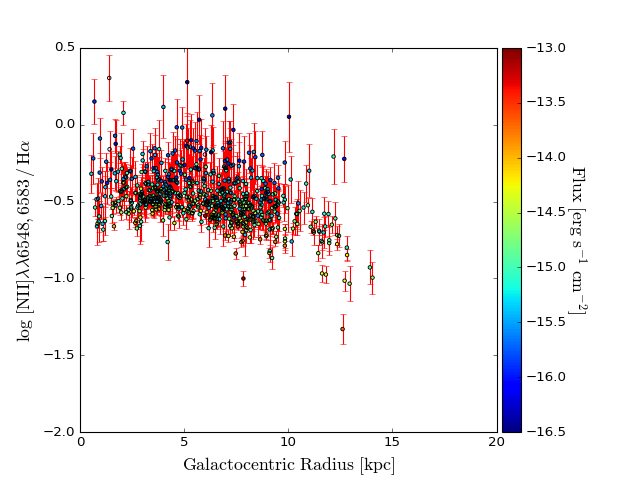

In [186]:
id_val=np.arange(1000, dtype=np.int)*2
print id_val
# Plot N2 (N2/Ha)
%matplotlib nbagg

indice = (nii2/enii2 > 3)&(ha/eha > 3)
err= np.log10((((nii2+enii2))*fnii2)/(((ha-eha)*fha)))-np.log10((((nii2))*fnii2)/(((ha)*fha)))
indice_err = (nii2/enii2 > 3)&(ha/eha > 3)
indice_reg = (nii2[id_val]/enii2[id_val] > 3) & (ha[id_val]/eha[id_val] > 3)

indice = indice_reg
indice_err = indice_reg
N2=(((nii2+enii2))*fnii2)/(((ha-eha)*fha))
cmin = -16.5
cmax = -13.0

print np.where(indice == True)[0]
plt.scatter(r[id_val[indice]]/1000, np.log10(N2[id_val[indice]]), marker='.', c=np.log10(flux_tot[id_val[indice]]), linewidths = 0.0, s = 40, zorder=2)
plt.errorbar(r[id_val[indice]]/(1000), np.log10(N2[id_val[indice]]), \
    yerr= np.log10((((nii2[id_val[indice]]+enii2[id_val[indice]]))*fnii2[id_val[indice]])/(((ha[id_val[indice]]-\
    eha[id_val[indice]])*fha[id_val[indice]])))-np.log10((((nii2[id_val[indice]]))*fnii2[id_val[indice]])/(((ha[id_val[indice]])*fha[id_val[indice]]))), \
    fmt='none',ecolor='r',markevery=2000,zorder=1)
cbar=plt.colorbar(ticks=[-16.5,-16, -15.5,-15,-14.5,-14,-13.5,-13],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)

plt.scatter(r[id_val[indice]]/1000, np.log10(N2[id_val[indice]]) , marker='.', c='none', linewidths = 0.8, s = 40, zorder=3)

#plt.plot(np.arange(25),fitt_N2(np.arange(25)), color='k', linewidth=1.5, zorder=4)
#plt.plot(np.arange(25),fitt_N2(np.arange(25))+0.25, '--k', zorder=4)
#plt.plot(np.arange(25),fitt_N2(np.arange(25))-0.25, '--k', zorder=4)

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[NII]\lambda\lambda6548,6583\,/\,H\alpha}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.0,0.5)
plt.show()
